In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data preparation

In [287]:
main_data = pd.read_csv("main_data_encoded_.csv")
sub_data = pd.read_csv("migrant_data.csv")

In [288]:
main_data

,person_id,gender,age,education_level,region,employment_status,self_employed,occupation_code,actual_hours,monthly_income,job_satisfaction,ghq_score,mental_health_score,disability_status,contract_type
0,68006127,2,52,4,1,97,-8,-8,-8.0,1443.50,-8,22,39.73,1,-8
1,68020564,1,52,4,1,8,-8,-8,-8.0,1036.00,-7,-7,-7.00,1,-8
2,68008847,2,64,5,1,2,1,415,39.0,2371.00,7,9,49.99,0,1
3,68009527,1,44,2,1,2,1,312,39.0,3208.33,4,11,-8.00,0,1
4,68061288,2,36,1,1,2,1,711,15.2,840.70,3,12,36.43,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42863,1638834134,2,46,1,7,2,1,611,36.0,1614.67,7,10,54.37,0,1
42864,1651543250,2,41,4,7,2,1,415,36.0,2956.22,6,7,54.37,0,1
42865,1651971650,1,46,1,7,1,-8,-8,-8.0,8.33,-8,12,41.00,0,-8
42866,1651971690,2,50,1,7,3,-8,-8,-8.0,8.33,-8,14,29.10,0,-8


In [289]:
sub_data = sub_data.drop_duplicates(subset='person_id')

In [290]:
sub_data

,person_id,immigrant_status,age
0,22445,UK-born,41
1,29925,UK-born,48
2,76165,UK-born,43
3,280165,UK-born,46
4,469205,UK-born,35
...,...,...,...
53172,1650217370,UK-born,18
53173,1650217410,UK-born,26
53174,1650217450,UK-born,22
53218,1653277250,Migrant,46


In [291]:
data = main_data.merge(sub_data[['person_id','immigrant_status']], on = 'person_id', how = 'left')

In [292]:
data.isnull().sum()

person_id                 0
gender                    0
age                       0
education_level           0
region                    0
employment_status         0
self_employed             0
occupation_code           0
actual_hours              0
monthly_income            0
job_satisfaction          0
ghq_score                 0
mental_health_score       0
disability_status         0
contract_type             0
immigrant_status       4236
dtype: int64

#### Summary:
##### Core demographic: person_id, gender, age, region, education_level, immigrant_status, birth_year
##### Employment: employment_status, self_employed, occupation_code, actual_hours
##### Pay and Income: hourly_pay, monthly_income
##### Satisfaction variables: job_satisfaction, pay_satisfaction, hours_satisfaction
##### Well-being: ghq_score, mental_health_score, health_status, disability_status
##### Contract: contract_type

### *Skills underemployment

##### First, we will try to encode to 0(overqualified) and 1(matched), first we have two columns: education level and job class

##### Step1: Enconde education

In [293]:
data['education_level'].unique()

array([ 4,  5,  2,  1,  3,  9, -8, -9])

#### Step2: Encode occupation code

In [294]:
def occupation_encode(code):
    if str(code)[0] != '-':
        main = int(str(code)[0])
    else:
        return None
    
    if main in [1,2,3]:
        return 4
    elif main in [4,5]:
        return 3
    elif main in [6,7]:
        return 2
    elif main in [8,9]:
        return 1
    else:
        return None
    
data["occupation_skill_level"] = data["occupation_code"].apply(occupation_encode)

#### Step3: Handle missing value of two columns

In [295]:
df_skills = data[(data["occupation_skill_level"].notna()) & (data['education_level'] > 0)]
df_skills = df_skills.drop_duplicates(subset='person_id')


In [296]:
df_skills

,person_id,gender,age,education_level,region,employment_status,self_employed,occupation_code,actual_hours,monthly_income,job_satisfaction,ghq_score,mental_health_score,disability_status,contract_type,immigrant_status,occupation_skill_level
2,68008847,2,64,5,1,2,1,415,39.0,2371.00,7,9,49.99,0,1,NaN,3.0
3,68009527,1,44,2,1,2,1,312,39.0,3208.33,4,11,-8.00,0,1,UK-born,4.0
4,68061288,2,36,1,1,2,1,711,15.2,840.70,3,12,36.43,0,1,UK-born,2.0
5,68010887,2,58,1,1,2,1,244,37.0,2100.00,7,7,57.16,0,1,UK-born,4.0
6,68068082,1,61,3,1,1,2,531,-8.0,7947.30,7,5,62.49,0,1,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42852,1651046890,1,62,1,7,1,2,821,-8.0,663.91,3,10,27.29,0,2,NaN,1.0
42853,1652984930,2,31,1,7,2,1,122,37.5,4800.00,3,12,29.35,0,2,UK-born,4.0
42855,1651156330,1,45,1,7,1,2,231,-8.0,1777.86,6,12,42.96,0,2,Migrant,4.0
42859,1653134570,2,19,3,7,7,1,721,4.0,833.33,5,16,29.15,0,2,Migrant,2.0


In [297]:
df_skills['skills_underemployment'] =(df_skills["education_level"] > df_skills["occupation_skill_level"]).astype(int)

In [298]:
df_skills

,person_id,gender,age,education_level,region,employment_status,self_employed,occupation_code,actual_hours,monthly_income,job_satisfaction,ghq_score,mental_health_score,disability_status,contract_type,immigrant_status,occupation_skill_level,skills_underemployment
2,68008847,2,64,5,1,2,1,415,39.0,2371.00,7,9,49.99,0,1,NaN,3.0,1
3,68009527,1,44,2,1,2,1,312,39.0,3208.33,4,11,-8.00,0,1,UK-born,4.0,0
4,68061288,2,36,1,1,2,1,711,15.2,840.70,3,12,36.43,0,1,UK-born,2.0,0
5,68010887,2,58,1,1,2,1,244,37.0,2100.00,7,7,57.16,0,1,UK-born,4.0,0
6,68068082,1,61,3,1,1,2,531,-8.0,7947.30,7,5,62.49,0,1,NaN,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42852,1651046890,1,62,1,7,1,2,821,-8.0,663.91,3,10,27.29,0,2,NaN,1.0,0
42853,1652984930,2,31,1,7,2,1,122,37.5,4800.00,3,12,29.35,0,2,UK-born,4.0,0
42855,1651156330,1,45,1,7,1,2,231,-8.0,1777.86,6,12,42.96,0,2,Migrant,4.0,0
42859,1653134570,2,19,3,7,7,1,721,4.0,833.33,5,16,29.15,0,2,Migrant,2.0,1


### *Wage underemployment

In [299]:
df_income = data[data['monthly_income'] > 0]
df_income = df_income.drop_duplicates(subset='person_id')

In [300]:
benchmark_occ = df_income.groupby("occupation_code")["monthly_income"].median()
df_income["benchmark_wage_occ"] = df_income['occupation_code'].map(benchmark_occ)


In [301]:
df_income["wage_underemployment"] = (df_income["monthly_income"] < df_income["benchmark_wage_occ"]).astype(int)

In [302]:
df_income['wage_underemployment'].mean()

0.49869613808518565

### *Combine

In [303]:
df_underemployment = data.merge(df_skills[['person_id','skills_underemployment']], how='left', on = 'person_id')
df_underemployment  = df_underemployment.merge(df_income[['person_id','wage_underemployment']], on = 'person_id', how = 'left')


In [304]:
df_underemployment['above_2_under'] = ((df_underemployment['skills_underemployment'] == 1)&(df_underemployment['wage_underemployment']==1)).astype(int)

### *Adaptive underemployment

In [305]:
df_adaptive_underemployment = df_underemployment[(df_underemployment['skills_underemployment'] == 1)|(df_underemployment['wage_underemployment']==1)]

In [306]:
df_adaptive_underemployment['satisfy'] = (df_adaptive_underemployment["job_satisfaction"] >=4).astype(int)

/var/folders/hy/zd3zjtb15k9f9916r76r6pj80000gn/T/ipykernel_50573/3998320403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adaptive_underemployment['satisfy'] = (df_adaptive_underemployment["job_satisfaction"] >=4).astype(int)


In [307]:
df_adaptive_underemployment = df_adaptive_underemployment.drop_duplicates(subset='person_id')

In [308]:
df_underemployment['contract_type'].unique()

array([-8,  1,  2, -1, -2])

### *Merging all the analysis

In [309]:
df_underemployment = df_underemployment.merge(df_adaptive_underemployment[['person_id','satisfy']], on ='person_id',how = 'left')

### *Core Analysis

In [310]:
df_underemployment['overall_rate'] = ((df_underemployment['skills_underemployment']==1)|(df_underemployment['skills_underemployment']==1)).astype(int)

In [344]:
gender_labels = {
    1: "male",
    2: "female",
    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know"
}

age_labels = {
    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know"
}



disability_status_labels = {
    0: "Not mentioned",
    1: "Mentioned",
    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know"
}

contract_type_labels = {
    1: "Permanent job",
    2: "Not permanent",
    -7: "proxy",
    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know"
}

job_satisfaction_labels = {

    -9: "missing",
    -8: "inapplicable",
    -7: "proxy",
    -2: "refusal",
    -1: "don't know"
}

region_labels = {
    1: "North East",
    2: "North West",
    3: "Yorkshire and the Humber",
    4: "East Midlands",
    5: "West Midlands",
    6: "East of England",
    7: "London",
    8: "South East",
    9: "South West",
    10: "Wales",
    11: "Scotland",
    12: "Northern Ireland",
    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know"
}

employment_status_labels = {
    1: "Self employed",
    2: "Paid employment",
    3: "Unemployed",
    4: "Retired",
    5: "On maternity leave",
    6: "Family care or home",
    7: "Full-time student",
    8: "Long-term sick or disabled",
    9: "Government training scheme",
    10: "Unpaid family business",
    11: "Apprenticeship",
    12: "Furlough",
    13: "Temporarily laid off / short-term working",
    14: "Shared parental leave",
    15: "Adoption leave",
    97: "Doing something else",
    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know"
}




self_employed_labels = {
    1: "Employed",
    2: "Self-employed",
    3: "Employed & self-employed",
    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know"
}

occupation_code_labels = {

    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know"
}

actual_hours_labels = {
    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know"
}



ghq_score_labels = {
    -9: "missing",
    -8: "inapplicable",
    -2: "refusal",
    -1: "don't know",
    -7: "proxy"
}











df_underemployment["gender"] = df_underemployment["gender"].replace(gender_labels)
df_underemployment["age"] = df_underemployment["age"].replace(age_labels)
df_underemployment["disability_status"] = df_underemployment["disability_status"].replace(disability_status_labels)
df_underemployment["contract_type"] = df_underemployment["contract_type"].replace(contract_type_labels)
df_underemployment["job_satisfaction"] = df_underemployment["job_satisfaction"].replace(job_satisfaction_labels)
df_underemployment["region"] = df_underemployment["region"].replace(region_labels)
df_underemployment["employment_status"] = df_underemployment["employment_status"].replace(employment_status_labels)
df_underemployment["self_employed"] = df_underemployment["self_employed"].replace(self_employed_labels)
df_underemployment["occupation_code"] = df_underemployment["occupation_code"].replace(occupation_code_labels)
df_underemployment["actual_hours"] = df_underemployment["actual_hours"].replace(actual_hours_labels)
df_underemployment["ghq_score"] = df_underemployment["ghq_score"].replace(ghq_score_labels)




##### Overall underemployment rate

In [312]:
df_underemployment.dropna()['overall_rate'].mean()

0.46353015472055575

##### Underemployment x gender

In [313]:
ct_gender = pd.crosstab(df_underemployment['gender'],df_underemployment['overall_rate'])

In [314]:
ct_gender

overall_rate,0,1
gender,,
female,18993,5193
male,14350,4324
missing,4,2
refusal,2,0


In [315]:
from scipy.stats import chi2_contingency

# use raw counts (not the normalized ct_gender) for chi-square test

chi2, p, dof, expected = chi2_contingency(ct_gender)

print(f"chi2={chi2:.4f}, p={p:.4g}, dof={dof}")
expected_df = pd.DataFrame(expected, index=ct_gender.index, columns=ct_gender.columns)
print("\nExpected frequencies:")
print(expected_df)

chi2=18.3020, p=0.0003811, dof=3

Expected frequencies:
overall_rate             0            1
gender                                 
female        18815.408090  5370.591910
male          14527.368340  4146.631660
missing           4.667678     1.332322
refusal           1.555893     0.444107


##### Underemployment x migration

In [316]:
ct_migration = pd.crosstab(df_underemployment['immigrant_status'],df_underemployment['overall_rate'])

In [317]:
ct_migration

overall_rate,0,1
immigrant_status,,
Migrant,4332,1006
UK-born,24931,7300
missing,807,256


In [318]:
chi2, p, dof, expected = chi2_contingency(ct_migration)

print(f"chi2={chi2:.4f}, p={p:.4g}, dof={dof}")
expected_df = pd.DataFrame(expected, index=ct_migration.index, columns=ct_migration.columns)
print("\nExpected frequencies:")
print(expected_df)

chi2=40.7290, p=1.432e-09, dof=2

Expected frequencies:
overall_rate                 0            1
immigrant_status                           
Migrant            4154.940464  1183.059536
UK-born           25087.651947  7143.348053
missing             827.407590   235.592410


##### Underemployment x disability

In [319]:
ct_disability = pd.crosstab(df_underemployment['disability_status'],df_underemployment['overall_rate'])

In [320]:
ct_disability

overall_rate,0,1
disability_status,,
Mentioned,3006,566
Not mentioned,30045,8903
don't know,76,19
refusal,222,31


In [321]:
chi2, p, dof, expected = chi2_contingency(ct_disability)

print(f"chi2={chi2:.4f}, p={p:.4g}, dof={dof}")
expected_df = pd.DataFrame(expected, index=ct_disability.index, columns=ct_disability.columns)
print("\nExpected frequencies:")
print(expected_df)

chi2=108.0357, p=2.904e-23, dof=3

Expected frequencies:
overall_rate                  0            1
disability_status                           
Mentioned           2778.824018   793.175982
Not mentioned      30299.450686  8648.549314
don't know            73.904894    21.095106
refusal              196.820402    56.179598


##### Underemployment x contract type

In [322]:
ct_contract = pd.crosstab(df_underemployment['contract_type'],df_underemployment['overall_rate'])

In [323]:
ct_contract

overall_rate,0,1
contract_type,,
Not permanent,2236,934
Permanent job,19168,7589
don't know,32,32
inapplicable,11886,955
refusal,27,9


In [324]:
chi2, p, dof, expected = chi2_contingency(ct_contract)

print(f"chi2={chi2:.4f}, p={p:.4g}, dof={dof}")
expected_df = pd.DataFrame(expected, index=ct_contract.index, columns=ct_contract.columns)
print("\nExpected frequencies:")
print(expected_df)

chi2=2333.9436, p=0, dof=4

Expected frequencies:
overall_rate              0            1
contract_type                           
Not permanent   2466.089624   703.910376
Permanent job  20815.507908  5941.492092
don't know        49.788560    14.211440
inapplicable    9989.607843  2851.392157
refusal           28.006065     7.993935


##### Underemployment x region

In [325]:
ct_region = pd.crosstab(df_underemployment['region'],df_underemployment['overall_rate'])

In [326]:
ct_region

overall_rate,0,1
region,,
East Midlands,2316,745
East of England,2811,847
London,4473,826
North East,1187,370
North West,3452,941
Northern Ireland,2052,693
Scotland,2823,737
South East,4075,1034
South West,2532,840


In [327]:
chi2, p, dof, expected = chi2_contingency(ct_region)

print(f"chi2={chi2:.4f}, p={p:.4g}, dof={dof}")
expected_df = pd.DataFrame(expected, index=ct_region.index, columns=ct_region.columns)
print("\nExpected frequencies:")
print(expected_df)

chi2=257.0352, p=4.658e-48, dof=12

Expected frequencies:
overall_rate                        0            1
region                                            
East Midlands             2381.293482   679.706518
East of England           2845.727396   812.272604
London                    4122.337198  1176.662802
North East                1211.262317   345.737683
North West                3417.517892   975.482108
Northern Ireland          2135.462466   609.537534
Scotland                  2769.488663   790.511337
South East                3974.527410  1134.472590
South West                2623.234767   748.765233
Wales                     1993.876248   569.123752
West Midlands             2893.182117   825.817883
Yorkshire and the Humber  2964.753173   846.246827
missing                     16.336871     4.663129


##### Underemployment x Job satisfaction

In [328]:
ct_job_satisfaction = pd.crosstab(df_underemployment['job_satisfaction'],df_underemployment['overall_rate'])

In [329]:
ct_job_satisfaction

overall_rate,0,1
job_satisfaction,,
1,252,115
2,703,209
3,1572,511
4,1507,814
5,4837,1834
6,9358,3330
7,3224,1736
don't know,22,8
inapplicable,11669,919


In [330]:
chi2, p, dof, expected = chi2_contingency(ct_job_satisfaction)

print(f"chi2={chi2:.4f}, p={p:.4g}, dof={dof}")
expected_df = pd.DataFrame(expected, index=ct_job_satisfaction.index, columns=ct_job_satisfaction.columns)
print("\nExpected frequencies:")
print(expected_df)

chi2=2567.4313, p=0, dof=10

Expected frequencies:
overall_rate                0            1
job_satisfaction                          
1                  285.506275    81.493725
2                  709.486983   202.513017
3                 1620.462046   462.537954
4                 1805.613255   515.386745
5                 5189.679458  1481.320542
6                 9870.582066  2817.417934
7                 3858.613418  1101.386582
don't know          23.338388     6.661612
inapplicable      9792.787441  2795.212559
proxy              129.917024    37.082976
refusal             63.013647    17.986353


##### Underemployment x Mental health

In [331]:
def mental_health_rate(score):
    if pd.isna(score):
        return None 
    elif score < 36:
        return "Poor"
    elif score < 46:
        return "Below Average"
    elif score < 56:
        return "Average"
    elif score < 66:
        return "Above Average"
    else:
        return "Very good"

In [332]:
# apply the renamed function directly to create the column (avoid shadowing the function name)
df_underemployment['mental_health_rate'] = df_underemployment['mental_health_score'].apply(mental_health_rate)

In [333]:
df_underemployment

,person_id,gender,age,education_level,region,employment_status,self_employed,occupation_code,actual_hours,monthly_income,...,disability_status,contract_type,immigrant_status,occupation_skill_level,skills_underemployment,wage_underemployment,above_2_under,satisfy,overall_rate,mental_health_rate
0,68006127,female,52,4,North East,Doing something else,inapplicable,inapplicable,inapplicable,1443.50,...,Mentioned,inapplicable,UK-born,NaN,NaN,0.0,0,NaN,0,Below Average
1,68020564,male,52,4,North East,Long-term sick or disabled,inapplicable,inapplicable,inapplicable,1036.00,...,Mentioned,inapplicable,UK-born,NaN,NaN,0.0,0,NaN,0,Poor
2,68008847,female,64,5,North East,Paid employment,Employed,415,39.0,2371.00,...,Not mentioned,Permanent job,NaN,3.0,1.0,0.0,0,1.0,1,Average
3,68009527,male,44,2,North East,Paid employment,Employed,312,39.0,3208.33,...,Not mentioned,Permanent job,UK-born,4.0,0.0,1.0,0,1.0,0,Poor
4,68061288,female,36,1,North East,Paid employment,Employed,711,15.2,840.70,...,Not mentioned,Permanent job,UK-born,2.0,0.0,1.0,0,0.0,0,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42863,1638834134,female,46,1,London,Paid employment,Employed,611,36.0,1614.67,...,Not mentioned,Permanent job,Migrant,2.0,0.0,1.0,0,0.0,0,Average
42864,1651543250,female,41,4,London,Paid employment,Employed,415,36.0,2956.22,...,Not mentioned,Permanent job,UK-born,3.0,0.0,1.0,0,1.0,0,Average
42865,1651971650,male,46,1,London,Self employed,inapplicable,inapplicable,inapplicable,8.33,...,Not mentioned,inapplicable,UK-born,NaN,NaN,1.0,0,0.0,0,Below Average
42866,1651971690,female,50,1,London,Unemployed,inapplicable,inapplicable,inapplicable,8.33,...,Not mentioned,inapplicable,Migrant,NaN,NaN,0.0,0,NaN,0,Poor


In [334]:
ct_metal_health = pd.crosstab(df_underemployment['mental_health_rate'],df_underemployment['overall_rate'])

In [335]:
ct_metal_health

overall_rate,0,1
mental_health_rate,,
Above Average,6357,2268
Average,11384,3264
Below Average,8034,2207
Poor,7484,1752
Very good,90,28


In [336]:
chi2, p, dof, expected = chi2_contingency(ct_metal_health)

print(f"chi2={chi2:.4f}, p={p:.4g}, dof={dof}")
expected_df = pd.DataFrame(expected, index=ct_metal_health.index, columns=ct_metal_health.columns)
print("\nExpected frequencies:")
print(expected_df)

chi2=142.2758, p=9.191e-30, dof=4

Expected frequencies:
overall_rate                   0            1
mental_health_rate                           
Above Average        6709.786437  1915.213563
Average             11395.356723  3252.643277
Below Average        7966.947583  2274.052417
Poor                 7185.111598  2050.888402
Very good              91.797658    26.202342


##### Underemployment x Education

In [337]:
df_underemployment['education_level'].unique()

array([ 4,  5,  2,  1,  3,  9, -8, -9])

In [338]:
def graduate(level):
    if pd.isna(level):
        return None 
    elif (level ==1)|(level==2):
        return "Graduate"
    else:
        return "Non-graduate"
    

In [339]:
df_underemployment['education_degree'] = df_underemployment['education_level'].apply(graduate)

In [340]:
ct_education = pd.crosstab(df_underemployment['education_degree'],df_underemployment['overall_rate'])

In [341]:
ct_education

overall_rate,0,1
education_degree,,
Graduate,19507,481
Non-graduate,13842,9038


In [342]:
chi2, p, dof, expected = chi2_contingency(ct_education)

print(f"chi2={chi2:.4f}, p={p:.4g}, dof={dof}")
expected_df = pd.DataFrame(expected, index=ct_education.index, columns=ct_education.columns)
print("\nExpected frequencies:")
print(expected_df)

chi2=8495.9622, p=0, dof=1

Expected frequencies:
overall_rate                 0            1
education_degree                           
Graduate          15549.589717  4438.410283
Non-graduate      17799.410283  5080.589717


# Template visual

/var/folders/hy/zd3zjtb15k9f9916r76r6pj80000gn/T/ipykernel_50573/1899383569.py:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, labels = ['Not Underemployed','Underemployed'] , loc='lower right', ncol=2, fontsize=14)


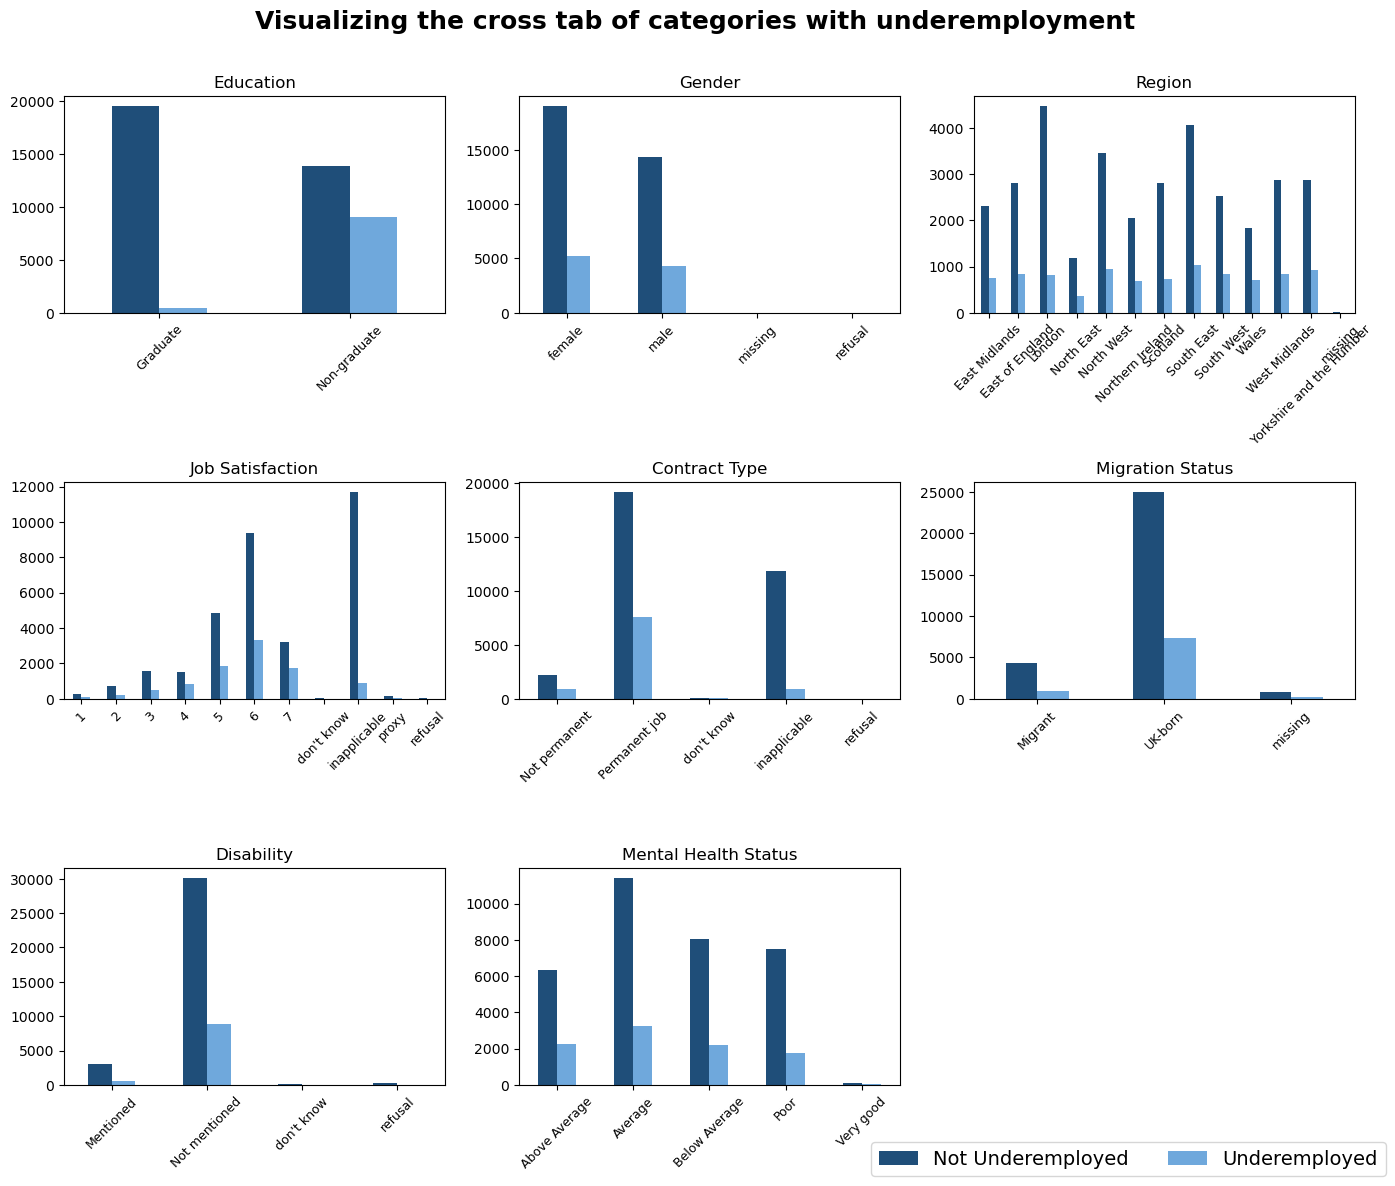

In [343]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 12))

def plot_ct(ct, ax, title):
    ct.plot(kind='bar', ax=ax, color=['#1f4e79', '#6fa8dc'])
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('')                  
    ax.tick_params(axis='x', rotation=45, labelsize=9) 
    ax.get_legend().remove()

plot_ct(ct_education, axes[0,0], 'Education')
plot_ct(ct_gender, axes[0,1], 'Gender')
plot_ct(ct_region, axes[0,2], 'Region')

plot_ct(ct_job_satisfaction, axes[1,0], 'Job Satisfaction')
plot_ct(ct_contract, axes[1,1], 'Contract Type')
plot_ct(ct_migration, axes[1,2], 'Migration Status')

plot_ct(ct_disability, axes[2,0], 'Disability')
plot_ct(ct_metal_health, axes[2,1], 'Mental Health Status')

fig.delaxes(axes[2,2])  

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels = ['Not Underemployed','Underemployed'] , loc='lower right', ncol=2, fontsize=14)
fig.suptitle("Visualizing the cross tab of categories with underemployment",fontsize = 18,fontweight = 'bold')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space at top for legend
plt.show()
